<a href="https://colab.research.google.com/github/ktonon0401/AI-training/blob/main/CNN_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout,Dense, Activation, Conv1D, Flatten, BatchNormalization, MaxPool1D
from keras.models import Sequential,load_model
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import cv2

In [ ]:
cancer = load_breast_cancer()

In [ ]:
pd.DataFrame(cancer.data, columns=cancer.feature_names).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
print(cancer.DESCR[:])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
x = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0,stratify=y)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
x_test.shape

(114, 30)

In [ ]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

In [ ]:
y_train.shape

(455,)

In [ ]:
# Initialize the CNN
model = Sequential()

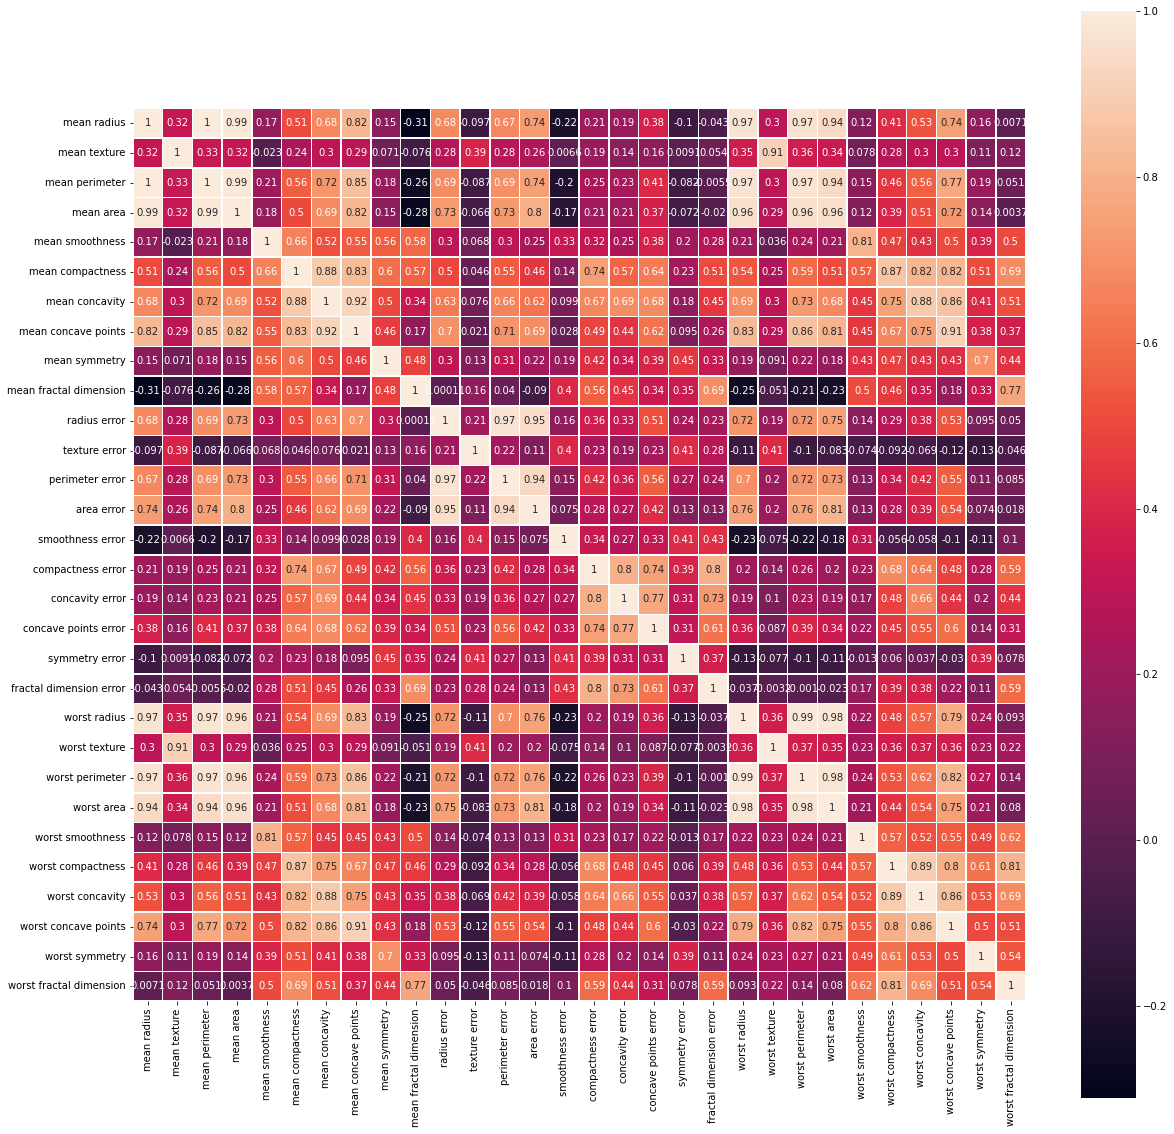

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,square=True,linewidths=0.5)
plt.savefig('heatmap.jpg')

In [ ]:
# Initialize the CNN
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Full connection
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_26 (Bat  (None, 29, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_27 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_27 (Bat  (None, 28, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 28, 64)          

In [ ]:
# opt = SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),verbose=1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15/15 [==============================] - 2s 25ms/step - loss: 0.7775 - accuracy: 0.6418 - val_loss: 0.6389 - val_accuracy: 0.8860
Epoch 2/30
15/15 [==============================] - 0s 11ms/step - loss: 0.5955 - accuracy: 0.7121 - val_loss: 0.6008 - val_accuracy: 0.9035
Epoch 3/30
15/15 [==============================] - 0s 11ms/step - loss: 0.4913 - accuracy: 0.7890 - val_loss: 0.5622 - val_accuracy: 0.9035
Epoch 4/30
15/15 [==============================] - 0s 10ms/step - loss: 0.3848 - accuracy: 0.8352 - val_loss: 0.5260 - val_accuracy: 0.9123
Epoch 5/30
15/15 [==============================] - 0s 10ms/step - loss: 0.3691 - accuracy: 0.8286 - val_loss: 0.4895 - val_accuracy: 0.9211
Epoch 6/30
15/15 [==============================] - 0s 11ms/step - loss: 0.3392 - accuracy: 0.8615 - val_loss: 0.4545 - val_accuracy: 0.9211
Epoch 7/30
15/15 [==============================] - 0s 10ms/step - loss: 0.3530 - accuracy: 0.8681 - val_loss: 0.4210 - val_accuracy: 0.9211
Epoch 8/30
15/15 [======

In [ ]:
def plot_learningCurve(history,epoch):
  #Plot training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()
  #Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

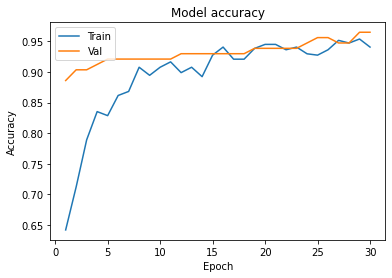

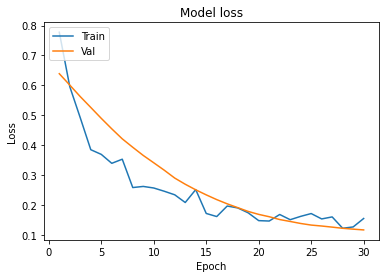

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_learningCurve(history,30)

In [ ]:
# model.save('/content/drive/MyDrive/AI_Colab/H5files/breast_cancer.h5')
model_pre=load_model('/content/drive/MyDrive/AI_Colab/H5files/breast_cancer.h5')

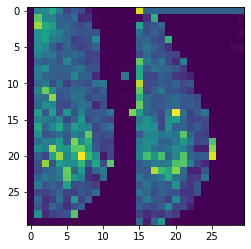

In [ ]:
# img = cv2.imread('ex2.jpg')
# img = cv2.resize(img,(30,30),1)
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_img)
# img=img_to_array(gray_img)
# img=img.astype('float64')
# img=img/255

In [ ]:
while(1):
  test_image = cv2.imread('ex2.jpg')
	test_image = cv2.resize(test_image,(30,30),1)
	test_image = test_image.reshape(30,30,1)
	test_image = np.array(test_image)
	test_image = test_image.astype('float32')
	test_image /= 255
	test_image= np.expand_dims(test_image, axis=0)
 	plt.imshow(test_image)
	plt.show()
	pa=model_pre.predict(test_image)
	if(model.predict(test_image)==[0]):
		s="BENIGN with Accuracy: "+ str(pa[0][0]*100) + "%\n"
	else:
		s="MALIGNANT with Accuracy: "+ str(pa[0][1]*100) + "%\n"

	print(s)

TabError: ignored

In [ ]:
np.argmax(model_pre.predict(img),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
Y = cancer.target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


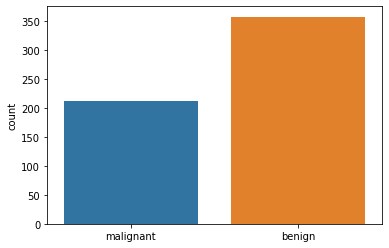

In [ ]:
sns.countplot(cancer.target_names[cancer.target],label='count')